# 回帰問題用の評価関数

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## 予測と実績の定義
実値（actual)に対して予測値（predict）が下のグラフのようにずれていた場合を想定。

In [ ]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
y_actual = np.ones(12) * 6
y_actual[3:5] = 1
y_pred = np.array([8, 6, 8, 3, 4, 1, 8, 7, 8, 4, 10, 20])

yojitsusa =  y_actual - y_pred

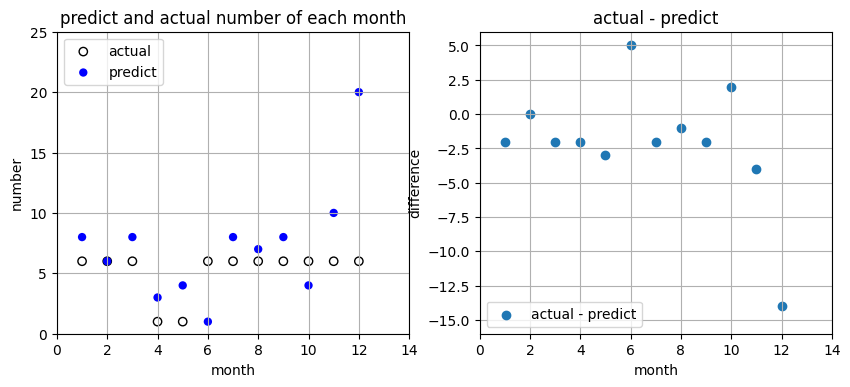

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=100, ncols=2)


ax[0].scatter(x, y_actual, marker="o", facecolor="none", edgecolors="black", label="actual")
ax[0].scatter(x, y_pred, marker="o", facecolor="blue", edgecolors="none", label="predict")


    # df_total_clu["longitude"], df_total_clu["latitude"],marker="o", facecolor="none",
    #         edgecolors="black", s=80)
ax[0].set_title('predict and actual number of each month')
ax[0].set_xlabel('month')
ax[0].set_ylabel('number')
ax[0].set_xlim(0,14)
ax[0].set_ylim(0,25)
ax[0].grid()
ax[0].legend(loc = "upper left")

ax[1].scatter(x, yojitsusa, label = 'actual - predict')
ax[1].set_title('actual - predict')
ax[1].set_xlabel('month')
ax[1].set_ylabel('difference')
ax[1].set_xlim(0,14)
ax[1].set_ylim(-16,6)
ax[1].grid()
ax[1].legend(loc = "lower left")


## MAE(Mean Absolute Error) 平均絶対誤差
外れ値の影響を小さく評価する。

$$
\begin{align}
MAE = \frac{1}{N}\displaystyle\sum_{i=1}^{N} |y_i - \hat{y}_i|
\end{align}
$$

ここで、
$N$はサンプル数、$y_i$はi番目のサンプルの真の値、$\hat{y}_i$はi番目のサンプルの予測値

In [ ]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(y_actual, y_pred)

print(f'MAEは {error:4f} です。')

MAEは 3.250000 です。


各要素の寄与度を可視化してみる。

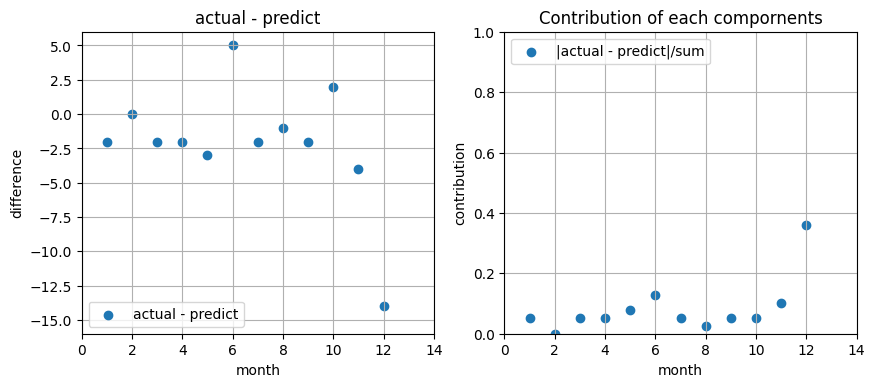

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=100, ncols=2)

ax[0].scatter(x, yojitsusa, label = 'actual - predict')
ax[0].set_title('actual - predict')
ax[0].set_xlabel('month')
ax[0].set_ylabel('difference')
ax[0].set_xlim(0,14)
ax[0].set_ylim(-16,6)
ax[0].grid()
ax[0].legend(loc = "lower left")


ax[1].scatter(x, abs(yojitsusa)/sum(abs(yojitsusa)), label = '|actual - predict|/sum')
ax[1].set_title('Contribution of each compornents')
ax[1].set_xlabel('month')
ax[1].set_ylabel('contribution')
ax[1].set_xlim(0,14)
ax[1].set_ylim(0,1)
ax[1].grid()
ax[1].legend(loc = "upper left")

## MSE(Mean Squared Error) 平均二乗誤差
外れ値の影響を大きく評価できるが、誤差の単位が目的変数の2乗となる。

$$
\begin{align}
MSE = \frac{1}{N}\displaystyle\sum_{i=1}^{N} (y_i - \hat{y}_i)^2
\end{align}
$$

ここで、
$N$はサンプル数、$y_i$はi番目のサンプルの真の値、$\hat{y}_i$はi番目のサンプルの予測値

In [ ]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(y_actual, y_pred)

print(f'MSEは {error:4f} です。')

MSEは 22.583333 です。


各要素の寄与度を可視化してみる。

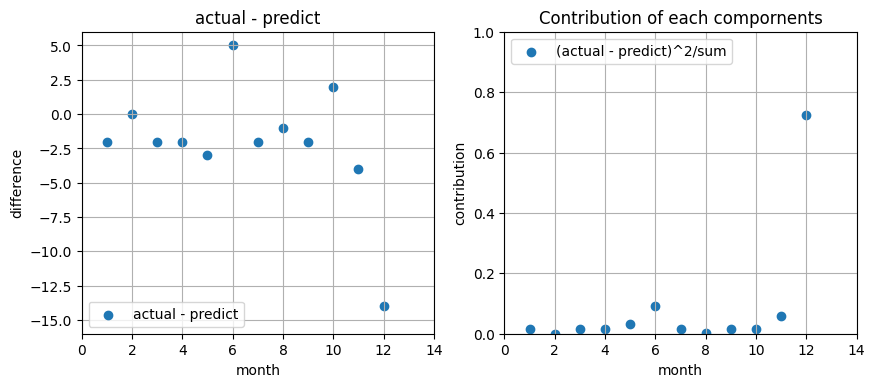

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=100, ncols=2)

ax[0].scatter(x, yojitsusa, label = 'actual - predict')
ax[0].set_title('actual - predict')
ax[0].set_xlabel('month')
ax[0].set_ylabel('difference')
ax[0].set_xlim(0,14)
ax[0].set_ylim(-16,6)
ax[0].grid()
ax[0].legend(loc = "lower left")


ax[1].scatter(x, np.square(yojitsusa)/sum(np.square(yojitsusa)), label = '(actual - predict)^2/sum')
ax[1].set_title('Contribution of each compornents')
ax[1].set_xlabel('month')
ax[1].set_ylabel('contribution')
ax[1].set_xlim(0,14)
ax[1].set_ylim(0,1)
ax[1].grid()
ax[1].legend(loc = "upper left")

2乗しているので外れ値の12月の寄与度がすごいですね。

## RMSE(Root Mean Squared Error) 平均平方二乗誤差
外れ値の影響を大きく評価でき、誤差の単位が目的変数と同じ

$$
\begin{align}
RMSE = \sqrt{\frac{1}{N}\displaystyle\sum_{i=1}^{N} (y_i - \hat{y}_i)^2}
\end{align}
$$

ここで、
$N$はサンプル数、$y_i$はi番目のサンプルの真の値、$\hat{y}_i$はi番目のサンプルの予測値

In [ ]:
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(y_actual, y_pred))

print(f'RMSEは {error:4f} です。')

RMSEは 4.752192 です。


各要素の寄与度を可視化してみる。

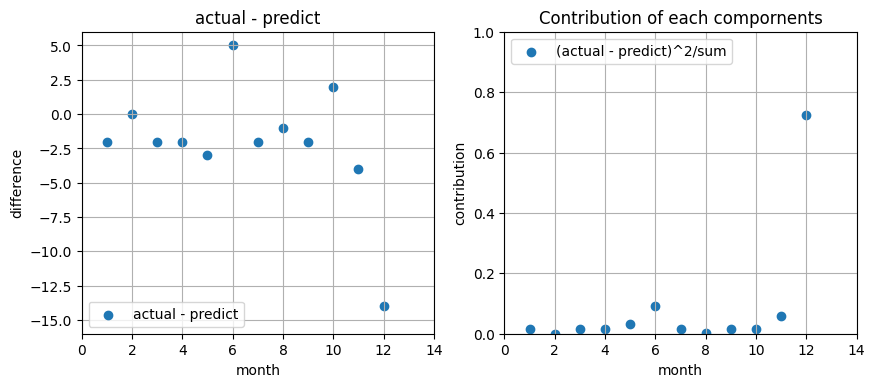

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=100, ncols=2)

ax[0].scatter(x, yojitsusa, label = 'actual - predict')
ax[0].set_title('actual - predict')
ax[0].set_xlabel('month')
ax[0].set_ylabel('difference')
ax[0].set_xlim(0,14)
ax[0].set_ylim(-16,6)
ax[0].grid()
ax[0].legend(loc = "lower left")


ax[1].scatter(x, np.square(yojitsusa)/sum(np.square(yojitsusa)), label = '(actual - predict)^2/sum')
ax[1].set_title('Contribution of each compornents')
ax[1].set_xlabel('month')
ax[1].set_ylabel('contribution')
ax[1].set_xlim(0,14)
ax[1].set_ylim(0,1)
ax[1].grid()
ax[1].legend(loc = "upper left")

寄与度はMSEと同じはずです。

## RMSLE(Root Mean Squared Logarithmic Error) 平均平方対数二乗誤差
目的変数の取りうる値の範囲が広いデータに利用される。予測値が実測値よりも小さい場合に誤差が大きくなる

$$
\begin{align}
RMSLE = \sqrt{\frac{1}{N}\displaystyle\sum_{i=1}^{N} (\log{(1+y_i)} - \log{(1+\hat{y}_i)})^2}
\end{align}
$$

ここで、
$N$はサンプル数、$y_i$はi番目のサンプルの真の値、$\hat{y}_i$はi番目のサンプルの予測値

配布資料とwikipediaで予測値と実値の符号が逆ですが、ここではwikipediaの定義を採用しています。
2乗を取っているので、計算結果は同じになるかと思います。

In [ ]:
from sklearn.metrics import mean_squared_log_error
error = np.sqrt(mean_squared_log_error(y_actual, y_pred))

print(f'RMSLEは {error:4f} です。')

RMSLEは 0.624792 です。


各要素の寄与度を可視化してみる。

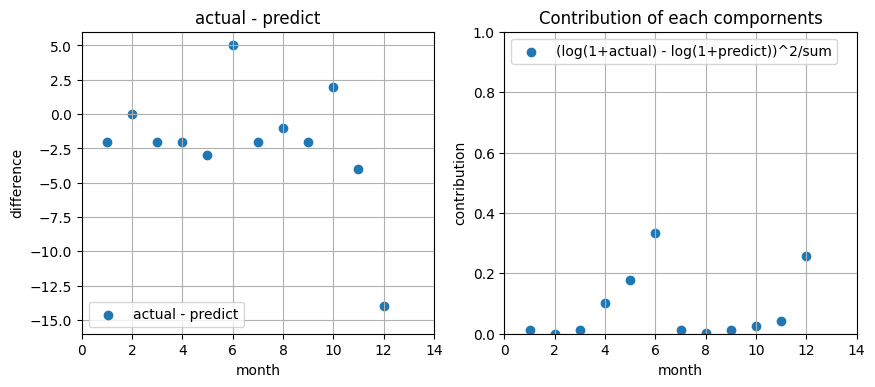

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=100, ncols=2)

ax[0].scatter(x, yojitsusa, label = 'actual - predict')
ax[0].set_title('actual - predict')
ax[0].set_xlabel('month')
ax[0].set_ylabel('difference')
ax[0].set_xlim(0,14)
ax[0].set_ylim(-16,6)
ax[0].grid()
ax[0].legend(loc = "lower left")


log_diff = np.square(np.log(1+y_actual) - np.log(1+y_pred))
contribution = log_diff/ sum(log_diff)
ax[1].scatter(x, contribution, label = '(log(1+actual) - log(1+predict))^2/sum')
ax[1].set_title('Contribution of each compornents')
ax[1].set_xlabel('month')
ax[1].set_ylabel('contribution')
ax[1].set_xlim(0,14)
ax[1].set_ylim(0,1)
ax[1].grid()
ax[1].legend(loc = "upper left")

実際の値よりも予測値が低い６月の寄与度が差分の絶対値でいえば最大の12月を上回っています。

## MAPE
もっともよく用いられる方法のうちの一つ。
実際値と予測値の誤差率の絶対値の加重平均。
各々の製品や期間についての平均誤差となる。すべての誤差率を対等に扱う考え方。


$$
\begin{align}
MAPE = \frac{1}{N} \displaystyle\sum_{i=1}^{N} | \frac {y_i - \hat{y}_i}   {y_i}|
\end{align}
$$

ここで、
$N$はサンプル数、$y_i$はi番目のサンプルの真の値、$\hat{y}_i$はi番目のサンプルの予測値

source: https://www.baeldung.com/cs/mape-vs-wape-vs-wmape

In [ ]:
error = sum(abs(y_actual-y_pred)/(y_actual))/len(y_actual)
print(f'MAPEは {error:4f} です。')

MAPEは 0.888889 です。


各要素の寄与度を可視化してみる。

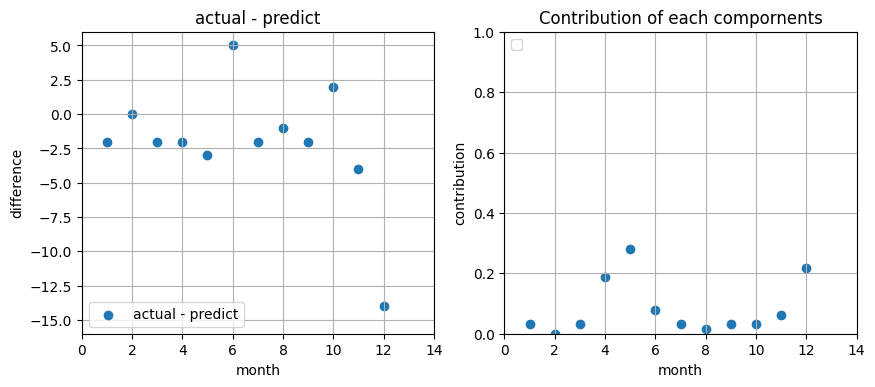

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=100, ncols=2)

ax[0].scatter(x, yojitsusa, label = 'actual - predict')
ax[0].set_title('actual - predict')
ax[0].set_xlabel('month')
ax[0].set_ylabel('difference')
ax[0].set_xlim(0,14)
ax[0].set_ylim(-16,6)
ax[0].grid()
ax[0].legend(loc = "lower left")

y = (abs(y_actual-y_pred)/(y_actual))/len(y_actual)
y= y/sum(y)

ax[1].scatter(x, y)
ax[1].set_title('Contribution of each compornents')
ax[1].set_xlabel('month')
ax[1].set_ylabel('contribution')
ax[1].set_xlim(0,14)
ax[1].set_ylim(0,1)
ax[1].grid()
ax[1].legend(loc = "upper left")

実値が1である４月と５月の影響が大きくなっています。

## WAPE
総販売個数で重みづけされた誤差指標で、MAPEの実績値が非常に小さい時に誤差を大きく算出してしまう問題に対応している。


$$
\begin{align}
WAPE = \frac{\displaystyle\sum_{i=1}^{N} |y_i - \hat{y}_i|}  {\displaystyle\sum_{i=1}^{N} |y_i|}
\end{align}
$$

ここで、
$N$はサンプル数、$y_i$はi番目のサンプルの真の値、$\hat{y}_i$はi番目のサンプルの予測値

source: https://www.baeldung.com/cs/mape-vs-wape-vs-wmape

In [ ]:
error = sum(abs(y_actual-y_pred))/sum(abs(y_actual))
print(f'WMAPEは {error:4f} です。')

WMAPEは 0.629032 です。


各要素の寄与度を可視化してみる。

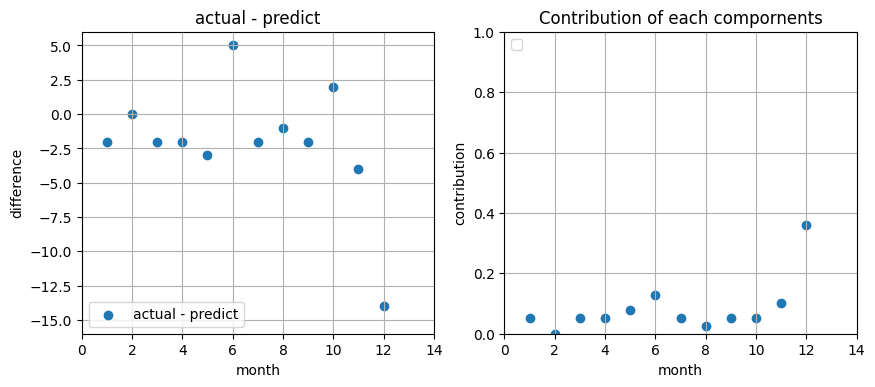

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=100, ncols=2)

ax[0].scatter(x, yojitsusa, label = 'actual - predict')
ax[0].set_title('actual - predict')
ax[0].set_xlabel('month')
ax[0].set_ylabel('difference')
ax[0].set_xlim(0,14)
ax[0].set_ylim(-16,6)
ax[0].grid()
ax[0].legend(loc = "lower left")

y = abs(y_actual-y_pred)/sum(abs(y_actual))
y = y / sum(y)

ax[1].scatter(x, y)
ax[1].set_title('Contribution of each compornents')
ax[1].set_xlabel('month')
ax[1].set_ylabel('contribution')
ax[1].set_xlim(0,14)
ax[1].set_ylim(0,1)
ax[1].grid()
ax[1].legend(loc = "upper left")

寄与度は最初のMAEと同じ

## WMAPE
各要素の重要度に応じて重みづけされた指標。評価する中で特別視したい要素がある場合に用いる。

$$
\begin{align}
WMAPE = \frac{\displaystyle\sum_{i=1}^{N}w_i |y_i - \hat{y}_i|}  {\displaystyle\sum_{i=1}^{N} w_i|y_i| }
\end{align}
$$

ここで、
$N$はサンプル数、$y_i$はi番目のサンプルの真の値、$\hat{y}_i$はi番目のサンプルの予測値、$w_i$はi番目のサンプルの重み

source: https://www.baeldung.com/cs/mape-vs-wape-vs-wmape

In [ ]:
# 重みw_iの定義：9月の重みだけ0.9、それ以外は0.1としてみる
wi = [0.1 for x in range(12)]
wi[8] = 0.9
wi = np.array(wi).astype(float)


error = sum(abs(y_actual-y_pred) * wi) /sum(abs(y_actual)* wi )

print(error)
print(f'WMAPEは {error:4f} です。')
print(f'重みは {wi} です')

0.5000000000000001
WMAPEは 0.500000 です。
重みは [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.9 0.1 0.1 0.1] です


各要素の寄与度を可視化してみる。

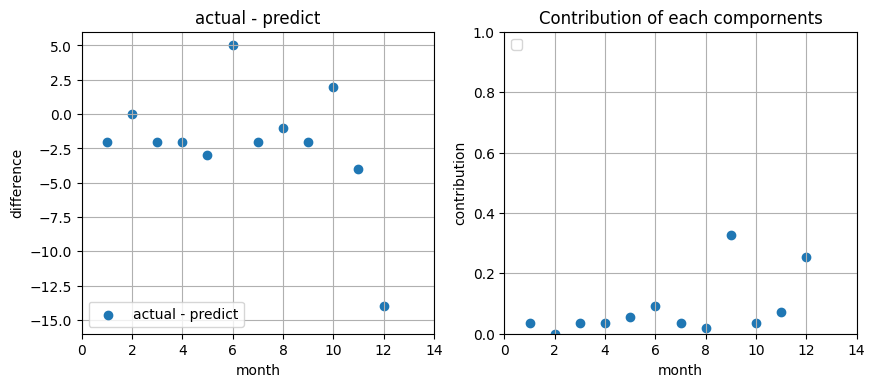

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=100, ncols=2)

ax[0].scatter(x, yojitsusa, label = 'actual - predict')
ax[0].set_title('actual - predict')
ax[0].set_xlabel('month')
ax[0].set_ylabel('difference')
ax[0].set_xlim(0,14)
ax[0].set_ylim(-16,6)
ax[0].grid()
ax[0].legend(loc = "lower left")

y = abs(y_actual-y_pred) * wi
y = y / sum(y)

ax[1].scatter(x, y)
ax[1].set_title('Contribution of each compornents')
ax[1].set_xlabel('month')
ax[1].set_ylabel('contribution')
ax[1].set_xlim(0,14)
ax[1].set_ylim(0,1)
ax[1].grid()
ax[1].legend(loc = "upper left")

重みづけした9月の寄与度があがっていますね。